<a href="https://colab.research.google.com/github/Dixonalexmg/Analisis-de-tienda---Alura-Challenge-Data-Science/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Configuración para mejorar la visualización de los gráficos
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12




url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Crear un diccionario para facilitar el manejo de las tiendas
tiendas = {
    "Tienda 1": tienda1,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [13]:
# 1. ANÁLISIS DE INGRESOS TOTALES

print("\n--- ANÁLISIS DE INGRESOS TOTALES ---")

ingresos = {
    'Tienda 1': tienda1['Precio'].sum(),
    'Tienda 2': tienda2['Precio'].sum(),
    'Tienda 3': tienda3['Precio'].sum(),
    'Tienda 4': tienda4['Precio'].sum()
}

for tienda, ingreso in ingresos.items():
    print(f"{tienda}: ${ingreso:,.2f}")


--- ANÁLISIS DE INGRESOS TOTALES ---
Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


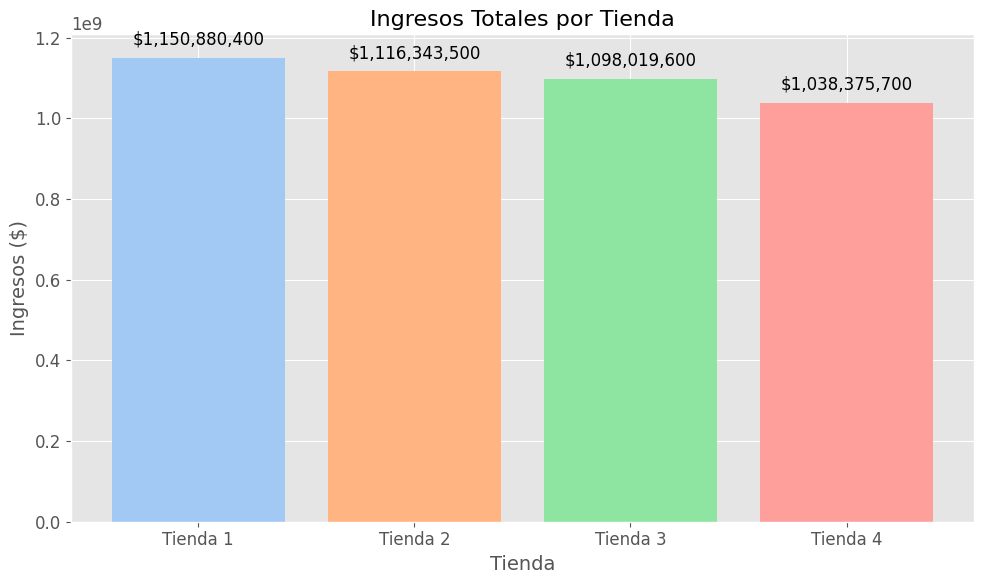

In [14]:
# Visualización de ingresos totales
plt.figure(figsize=(10, 6))
plt.bar(ingresos.keys(), ingresos.values(), color=sns.color_palette("pastel", 4))
plt.title('Ingresos Totales por Tienda', fontsize=16)
plt.ylabel('Ingresos ($)', fontsize=14)
plt.xlabel('Tienda', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Agregar valores sobre las barras
for i, (tienda, ingreso) in enumerate(ingresos.items()):
    plt.text(i, ingreso + (max(ingresos.values()) * 0.02), f'${ingreso:,.0f}',
             ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [15]:
print("\n--- ANÁLISIS DE PRODUCTOS POR CATEGORÍA ---")

def analizar_categorias(store, nombre):
    cat_counts = store['Categoría del Producto'].value_counts()
    print(f"\n{nombre}:")
    for cat, count in cat_counts.items():
        print(f"  {cat}: {count} productos vendidos")
    return cat_counts

# Analizar categorías para cada tienda
cat1 = analizar_categorias(tienda1, "Tienda 1")
cat2 = analizar_categorias(tienda2, "Tienda 2")
cat3 = analizar_categorias(tienda3, "Tienda 3")
cat4 = analizar_categorias(tienda4, "Tienda 4")



--- ANÁLISIS DE PRODUCTOS POR CATEGORÍA ---

Tienda 1:
  Muebles: 465 productos vendidos
  Electrónicos: 448 productos vendidos
  Juguetes: 324 productos vendidos
  Electrodomésticos: 312 productos vendidos
  Deportes y diversión: 284 productos vendidos
  Instrumentos musicales: 182 productos vendidos
  Libros: 173 productos vendidos
  Artículos para el hogar: 171 productos vendidos

Tienda 2:
  Muebles: 442 productos vendidos
  Electrónicos: 422 productos vendidos
  Juguetes: 313 productos vendidos
  Electrodomésticos: 305 productos vendidos
  Deportes y diversión: 275 productos vendidos
  Instrumentos musicales: 224 productos vendidos
  Libros: 197 productos vendidos
  Artículos para el hogar: 181 productos vendidos

Tienda 3:
  Muebles: 499 productos vendidos
  Electrónicos: 451 productos vendidos
  Juguetes: 315 productos vendidos
  Electrodomésticos: 278 productos vendidos
  Deportes y diversión: 277 productos vendidos
  Libros: 185 productos vendidos
  Instrumentos musicales: 17

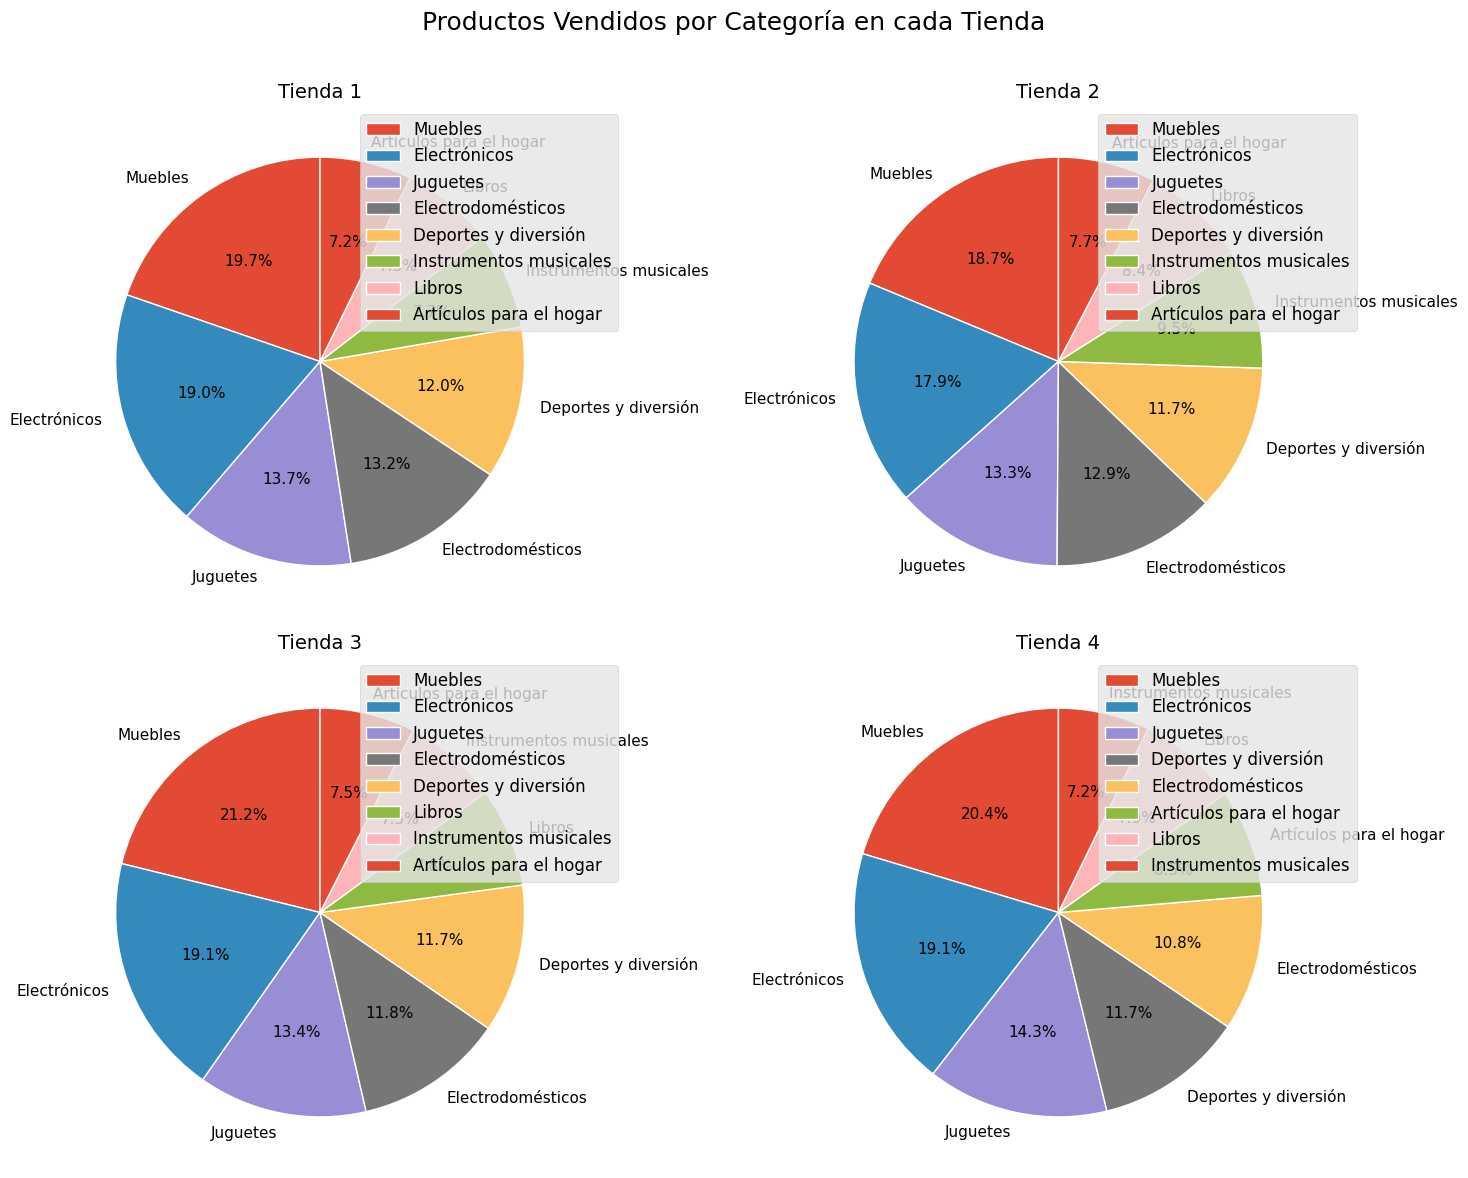

In [16]:
# Visualización de categorías más vendidas por tienda
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Productos Vendidos por Categoría en cada Tienda', fontsize=18)

# Función para crear gráfico de pastel
def crear_grafico_pastel(ax, datos, titulo):
    wedges, texts, autotexts = ax.pie(
        datos.values,
        labels=datos.index,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'edgecolor': 'w', 'linewidth': 1},
        textprops={'fontsize': 11}
    )
    ax.set_title(titulo, fontsize=14)
    # Leyenda fuera del gráfico
    ax.legend(datos.index, loc="upper right", bbox_to_anchor=(1.1, 1))

crear_grafico_pastel(axes[0, 0], cat1, 'Tienda 1')
crear_grafico_pastel(axes[0, 1], cat2, 'Tienda 2')
crear_grafico_pastel(axes[1, 0], cat3, 'Tienda 3')
crear_grafico_pastel(axes[1, 1], cat4, 'Tienda 4')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

<Figure size 1400x800 with 0 Axes>

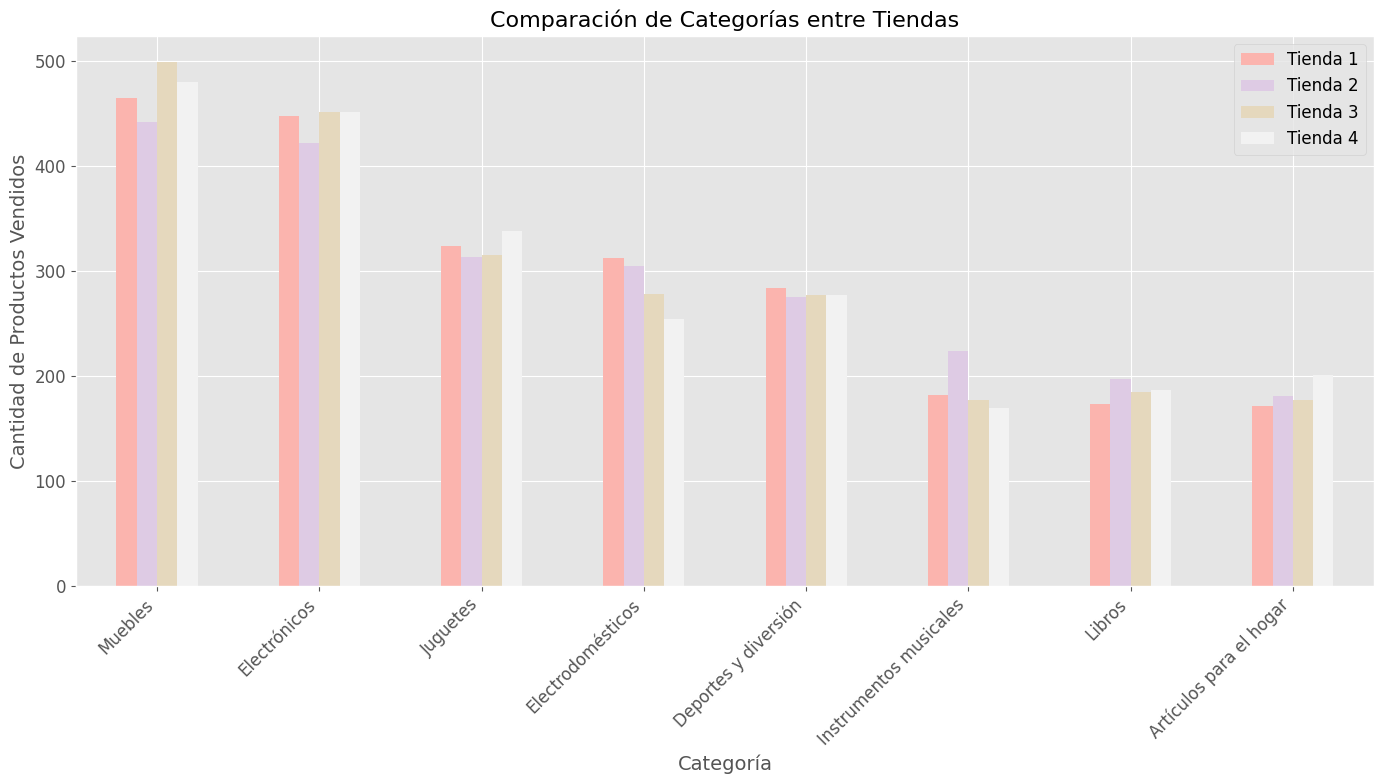

In [17]:
# También mostramos una comparación directa de categorías entre tiendas
plt.figure(figsize=(14, 8))
categorias_unicas = set()
for cats in [cat1.index, cat2.index, cat3.index, cat4.index]:
    categorias_unicas.update(cats)

# Crear un DataFrame para comparar categorías
comparacion_cats = pd.DataFrame(index=sorted(categorias_unicas))

# Agregar datos de cada tienda
for i, cat_data in enumerate([cat1, cat2, cat3, cat4], 1):
    # Rellenar con 0 las categorías que no existen en la tienda
    for cat in categorias_unicas:
        if cat not in cat_data:
            cat_data[cat] = 0
    comparacion_cats[f'Tienda {i}'] = pd.Series(cat_data)

# Ordenar por la suma total de ventas por categoría
comparacion_cats['Total'] = comparacion_cats.sum(axis=1)
comparacion_cats = comparacion_cats.sort_values('Total', ascending=False)
comparacion_cats = comparacion_cats.drop('Total', axis=1)

# Graficar comparación de categorías
comparacion_cats.plot(kind='bar', figsize=(14, 8), colormap='Pastel1')
plt.title('Comparación de Categorías entre Tiendas', fontsize=16)
plt.xlabel('Categoría', fontsize=14)
plt.ylabel('Cantidad de Productos Vendidos', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [18]:
# 3. ANÁLISIS DE SATISFACCIÓN DEL CLIENTE (CALIFICACIONES)
print("\n--- ANÁLISIS DE SATISFACCIÓN DEL CLIENTE ---")

calificaciones = {
    'Tienda 1': tienda1['Calificación'].mean(),
    'Tienda 2': tienda2['Calificación'].mean(),
    'Tienda 3': tienda3['Calificación'].mean(),
    'Tienda 4': tienda4['Calificación'].mean()
}

for tienda, calificacion in calificaciones.items():
    print(f"{tienda}: {calificacion:.2f} / 5.00")



--- ANÁLISIS DE SATISFACCIÓN DEL CLIENTE ---
Tienda 1: 3.98 / 5.00
Tienda 2: 4.04 / 5.00
Tienda 3: 4.05 / 5.00
Tienda 4: 4.00 / 5.00


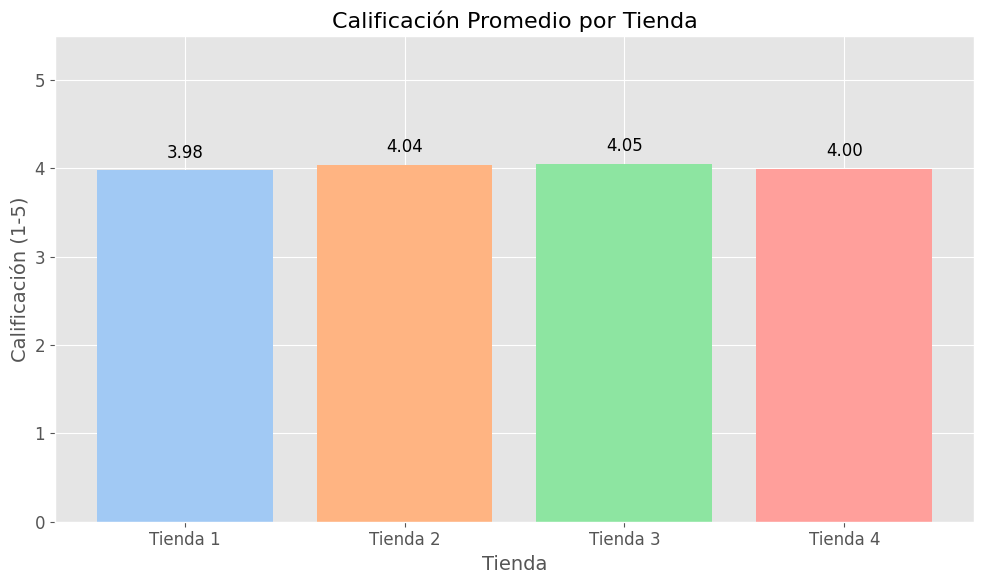

<ipython-input-19-0161cc9b535f>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Calificación', data=tienda, palette='pastel')
<ipython-input-19-0161cc9b535f>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Calificación', data=tienda, palette='pastel')
<ipython-input-19-0161cc9b535f>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Calificación', data=tienda, palette='pastel')
<ipython-input-19-0161cc9b535f>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

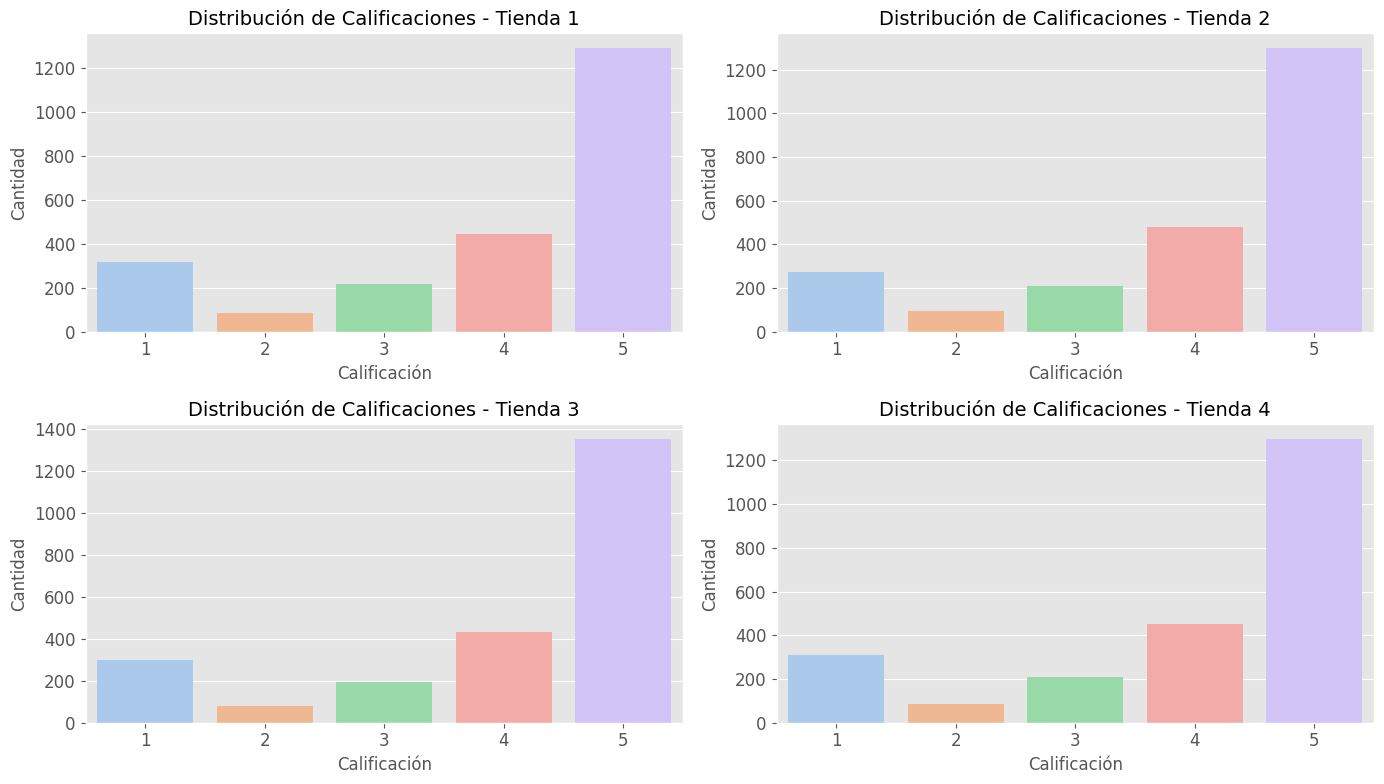

In [19]:

# Visualización de calificaciones promedio
plt.figure(figsize=(10, 6))
bars = plt.bar(calificaciones.keys(), calificaciones.values(), color=sns.color_palette("pastel", 4))
plt.title('Calificación Promedio por Tienda', fontsize=16)
plt.ylabel('Calificación (1-5)', fontsize=14)
plt.xlabel('Tienda', fontsize=14)
plt.ylim(0, 5.5)  # Establecer límite para que se vea la escala completa
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Agregar valores sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# Distribución de calificaciones
plt.figure(figsize=(14, 8))
for i, tienda in enumerate([tienda1, tienda2, tienda3, tienda4], 1):
    plt.subplot(2, 2, i)
    sns.countplot(x='Calificación', data=tienda, palette='pastel')
    plt.title(f'Distribución de Calificaciones - Tienda {i}', fontsize=14)
    plt.xlabel('Calificación', fontsize=12)
    plt.ylabel('Cantidad', fontsize=12)

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [21]:
# 4. PRODUCTOS MÁS Y MENOS VENDIDOS
print("\n--- PRODUCTOS MÁS Y MENOS VENDIDOS ---")

def analizar_productos(store, nombre):
    prod_counts = store['Producto'].value_counts()

    print(f"\n{nombre}:")
    print(f"  Productos más vendidos:")
    for prod, count in prod_counts.head(3).items():
        print(f"    - {prod}: {count} unidades")

    print(f"  Productos menos vendidos:")
    for prod, count in prod_counts.tail(3).items():
        print(f"    - {prod}: {count} unidades")

    return prod_counts

# Analizar productos para cada tienda
prod1 = analizar_productos(tienda1, "Tienda 1")
prod2 = analizar_productos(tienda2, "Tienda 2")
prod3 = analizar_productos(tienda3, "Tienda 3")
prod4 = analizar_productos(tienda4, "Tienda 4")



--- PRODUCTOS MÁS Y MENOS VENDIDOS ---

Tienda 1:
  Productos más vendidos:
    - Microondas: 60 unidades
    - TV LED UHD 4K: 60 unidades
    - Armario: 60 unidades
  Productos menos vendidos:
    - Olla de presión: 35 unidades
    - Auriculares con micrófono: 33 unidades
    - Celular ABXY: 33 unidades

Tienda 2:
  Productos más vendidos:
    - Iniciando en programación: 65 unidades
    - Microondas: 62 unidades
    - Batería: 61 unidades
  Productos menos vendidos:
    - Mesa de comedor: 34 unidades
    - Impresora: 34 unidades
    - Juego de mesa: 32 unidades

Tienda 3:
  Productos más vendidos:
    - Kit de bancas: 57 unidades
    - Mesa de comedor: 56 unidades
    - Cama king: 56 unidades
  Productos menos vendidos:
    - Mochila: 36 unidades
    - Microondas: 36 unidades
    - Bloques de construcción: 35 unidades

Tienda 4:
  Productos más vendidos:
    - Cama box: 62 unidades
    - Cubertería: 59 unidades
    - Dashboards con Power BI: 56 unidades
  Productos menos vendidos:
 

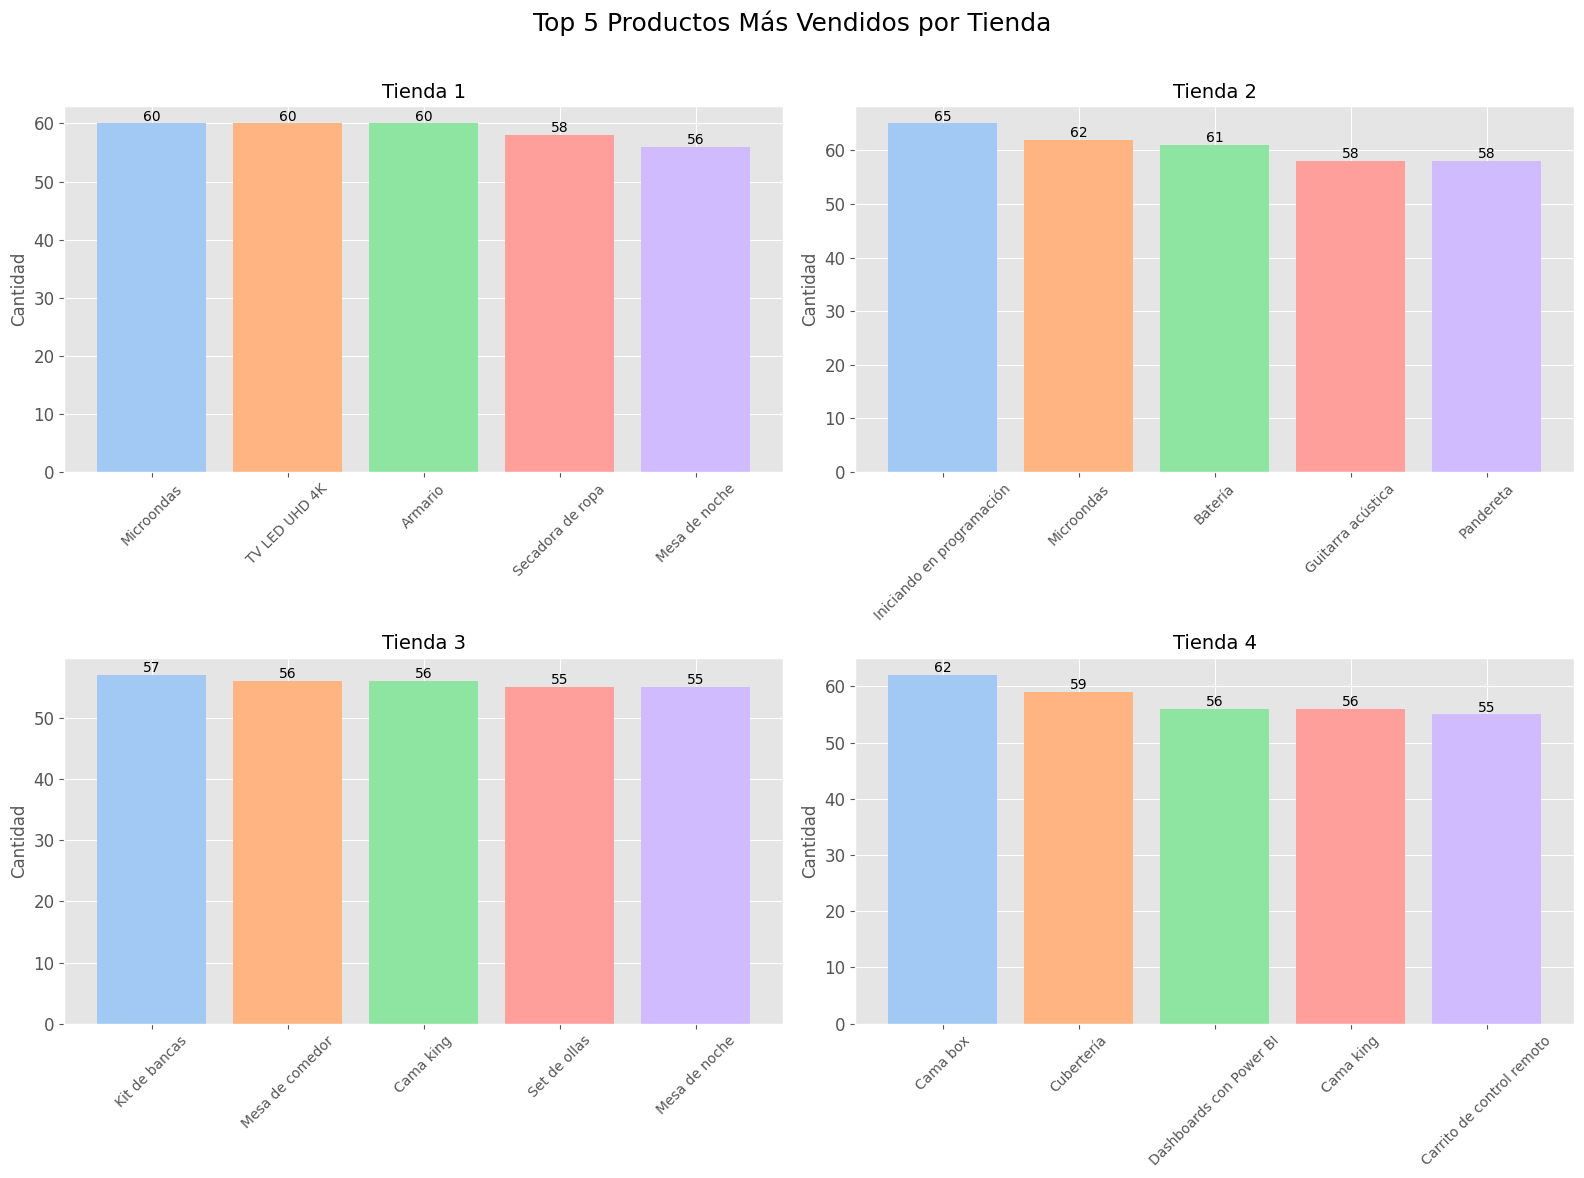

In [22]:
# Visualización de productos más vendidos (top 5 por tienda)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Top 5 Productos Más Vendidos por Tienda', fontsize=18)

def plot_top_products(ax, prods, titulo):
    top5 = prods.head(5)
    ax.bar(top5.index, top5.values, color=sns.color_palette("pastel", 5))
    ax.set_title(titulo, fontsize=14)
    ax.set_ylabel('Cantidad', fontsize=12)
    ax.tick_params(axis='x', rotation=45, labelsize=10)

    # Añadir valores sobre las barras
    for i, v in enumerate(top5.values):
        ax.text(i, v + 0.5, str(v), ha='center', fontsize=10)

plot_top_products(axes[0, 0], prod1, 'Tienda 1')
plot_top_products(axes[0, 1], prod2, 'Tienda 2')
plot_top_products(axes[1, 0], prod3, 'Tienda 3')
plot_top_products(axes[1, 1], prod4, 'Tienda 4')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# 5. Envío promedio por tienda

In [23]:
print("\n--- ANÁLISIS DE COSTOS DE ENVÍO ---")

envios = {
    'Tienda 1': tienda1['Costo de envío'].mean(),
    'Tienda 2': tienda2['Costo de envío'].mean(),
    'Tienda 3': tienda3['Costo de envío'].mean(),
    'Tienda 4': tienda4['Costo de envío'].mean()
}

for tienda, costo in envios.items():
    print(f"{tienda}: ${costo:.2f}")



--- ANÁLISIS DE COSTOS DE ENVÍO ---
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


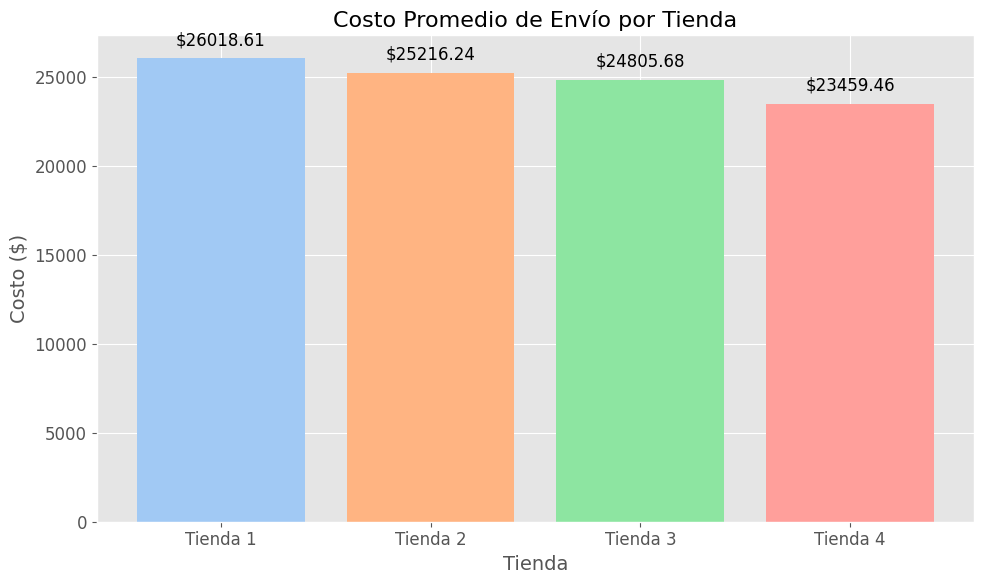

In [24]:
# Visualización de costos de envío
plt.figure(figsize=(10, 6))
plt.bar(envios.keys(), envios.values(), color=sns.color_palette("pastel", 4))
plt.title('Costo Promedio de Envío por Tienda', fontsize=16)
plt.ylabel('Costo ($)', fontsize=14)
plt.xlabel('Tienda', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Agregar valores sobre las barras
for i, (tienda, costo) in enumerate(envios.items()):
    plt.text(i, costo + (max(envios.values()) * 0.02), f'${costo:.2f}',
             ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

In [31]:
# 6. ANÁLISIS DE EFICIENCIA (INGRESOS RELATIVOS A CALIFICACIONES Y ENVÍOS)
print("\n--- ANÁLISIS DE EFICIENCIA ---")

# Crear un DataFrame para comparar todas las métricas
comparacion = pd.DataFrame({
    'Ingresos': [ingresos['Tienda 1'], ingresos['Tienda 2'], ingresos['Tienda 3'], ingresos['Tienda 4']],
    'Calificación': [calificaciones['Tienda 1'], calificaciones['Tienda 2'], calificaciones['Tienda 3'], calificaciones['Tienda 4']],
    'Costo_Envío': [envios['Tienda 1'], envios['Tienda 2'], envios['Tienda 3'], envios['Tienda 4']],
    'Num_Ventas': [len(tienda1), len(tienda2), len(tienda3), len(tienda4)]
}, index=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'])

# Calcular algunas métricas adicionales de eficiencia
comparacion['Ingreso_por_Venta'] = comparacion['Ingresos'] / comparacion['Num_Ventas']
comparacion['Relacion_Calidad_Precio'] = comparacion['Calificación'] / comparacion['Ingreso_por_Venta'] * 1000  # Escalado para visualización
comparacion['Eficiencia_Envío'] = comparacion['Ingresos'] / (comparacion['Costo_Envío'] * comparacion['Num_Ventas'])

print("\nComparación de métricas entre tiendas:")
print(comparacion.round(2))



--- ANÁLISIS DE EFICIENCIA ---

Comparación de métricas entre tiendas:
              Ingresos  Calificación  Costo_Envío  Num_Ventas  \
Tienda 1  1.150880e+09          3.98     26018.61        2359   
Tienda 2  1.116344e+09          4.04     25216.24        2359   
Tienda 3  1.098020e+09          4.05     24805.68        2359   
Tienda 4  1.038376e+09          4.00     23459.46        2358   

          Ingreso_por_Venta  Relacion_Calidad_Precio  Eficiencia_Envío  
Tienda 1          487867.91                     0.01             18.75  
Tienda 2          473227.43                     0.01             18.77  
Tienda 3          465459.77                     0.01             18.76  
Tienda 4          440362.89                     0.01             18.77  


In [36]:
# 7. RESUMEN Y RECOMENDACIÓN FINAL
print("\n--- RESUMEN Y RECOMENDACIÓN FINAL ---")

# Puntuar cada tienda en diferentes aspectos (1 = peor, 4 = mejor)
puntuaciones = pd.DataFrame(index=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'])

# Función para rankear tiendas por métrica (menor o mayor es mejor)
def rankear_tiendas(serie, mayor_es_mejor=True):
    if mayor_es_mejor:
        return serie.rank()
    else:
        return (serie * -1).rank()

# Puntuar en diferentes aspectos
puntuaciones['Ingresos'] = rankear_tiendas(comparacion['Ingresos'])
puntuaciones['Calificación'] = rankear_tiendas(comparacion['Calificación'])
puntuaciones['Costo_Envío'] = rankear_tiendas(comparacion['Costo_Envío'], False)  # Menor es mejor
puntuaciones['Ingreso_por_Venta'] = rankear_tiendas(comparacion['Ingreso_por_Venta'])
puntuaciones['Eficiencia_Envío'] = rankear_tiendas(comparacion['Eficiencia_Envío'])

# Calcular puntuación total
puntuaciones['Total'] = puntuaciones.sum(axis=1)

print("\nPuntuación de las tiendas (mayor es mejor):")
print(puntuaciones.round(2))

# Identificar la tienda con menor puntuación total
tienda_recomendada = puntuaciones['Total'].idxmin()

print(f"\nRECOMENDACIÓN: Basado en el análisis de datos, se recomienda que el Sr. Juan venda la {tienda_recomendada}.")
print("\nJustificación:")

# Generar justificación basada en las métricas donde la tienda tiene peor desempeño
for metrica in ['Ingresos', 'Calificación', 'Costo_Envío', 'Ingreso_por_Venta', 'Eficiencia_Envío']:
    if puntuaciones.loc[tienda_recomendada, metrica] <= 2:  # Si está entre las dos peores
        if metrica == 'Ingresos':
            print(f"- La {tienda_recomendada} tiene ingresos relativamente bajos: ${comparacion.loc[tienda_recomendada, 'Ingresos']:,.2f}")
        elif metrica == 'Calificación':
            print(f"- La {tienda_recomendada} tiene una calificación promedio baja: {comparacion.loc[tienda_recomendada, 'Calificación']:.2f}/5.00")
        elif metrica == 'Costo_Envío':
            print(f"- La {tienda_recomendada} tiene costos de envío relativamente altos: ${comparacion.loc[tienda_recomendada, 'Costo_Envío']:.2f}")
        elif metrica == 'Ingreso_por_Venta':
            print(f"- La {tienda_recomendada} tiene un ingreso por venta bajo: ${comparacion.loc[tienda_recomendada, 'Ingreso_por_Venta']:.2f}")
        elif metrica == 'Eficiencia_Envío':
            print(f"- La {tienda_recomendada} tiene baja eficiencia de envío: {comparacion.loc[tienda_recomendada, 'Eficiencia_Envío']:.2f}")

print("\nEsta tienda muestra el rendimiento más bajo en la evaluación general de todas las métricas clave, lo que la convierte en la candidata ideal para vender y permitir que el Sr. Juan enfoque sus recursos en las tiendas más rentables.")



--- RESUMEN Y RECOMENDACIÓN FINAL ---

Puntuación de las tiendas (mayor es mejor):
          Ingresos  Calificación  Costo_Envío  Ingreso_por_Venta  \
Tienda 1       4.0           1.0          1.0                4.0   
Tienda 2       3.0           3.0          2.0                3.0   
Tienda 3       2.0           4.0          3.0                2.0   
Tienda 4       1.0           2.0          4.0                1.0   

          Eficiencia_Envío  Total  
Tienda 1               1.0   11.0  
Tienda 2               3.0   14.0  
Tienda 3               2.0   13.0  
Tienda 4               4.0   12.0  

RECOMENDACIÓN: Basado en el análisis de datos, se recomienda que el Sr. Juan venda la Tienda 1.

Justificación:
- La Tienda 1 tiene una calificación promedio baja: 3.98/5.00
- La Tienda 1 tiene costos de envío relativamente altos: $26018.61
- La Tienda 1 tiene baja eficiencia de envío: 18.75

Esta tienda muestra el rendimiento más bajo en la evaluación general de todas las métricas clave, lo

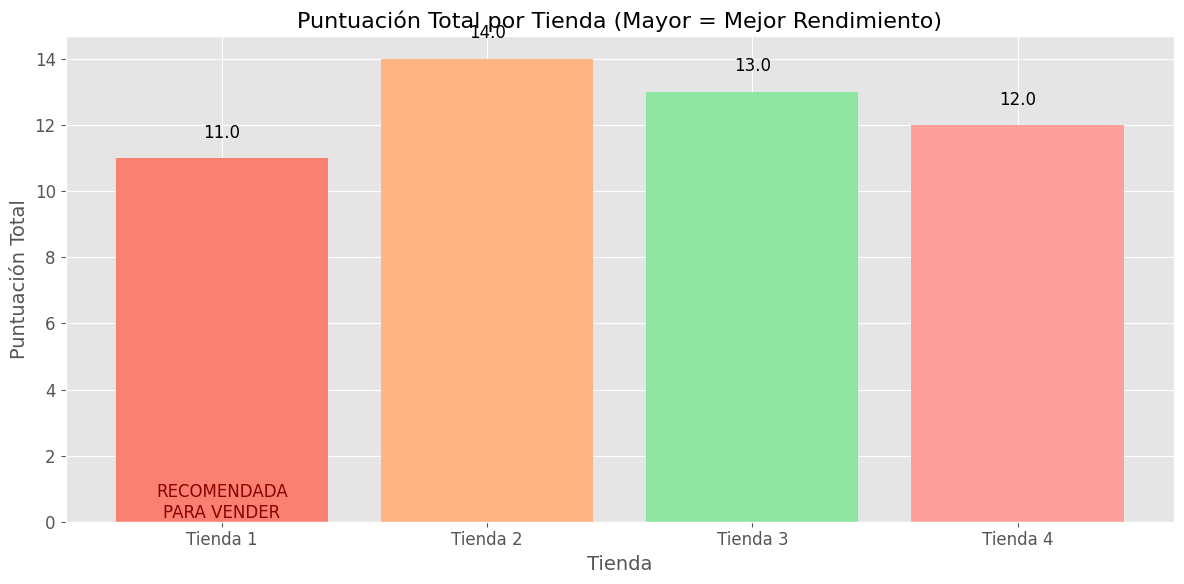

In [37]:
# Visualizar la puntuación final
plt.figure(figsize=(12, 6))
plt.bar(puntuaciones.index, puntuaciones['Total'], color=sns.color_palette("pastel", 4))
plt.title('Puntuación Total por Tienda (Mayor = Mejor Rendimiento)', fontsize=16)
plt.xlabel('Tienda', fontsize=14)
plt.ylabel('Puntuación Total', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Agregar valores sobre las barras
for i, (tienda, puntaje) in enumerate(puntuaciones['Total'].items()):
    plt.text(i, puntaje + 0.5, f'{puntaje:.1f}', ha='center', va='bottom', fontsize=12)

# Resaltar la tienda recomendada para vender
plt.bar(tienda_recomendada, puntuaciones.loc[tienda_recomendada, 'Total'], color='salmon')
plt.text(list(puntuaciones.index).index(tienda_recomendada), 0,
         'RECOMENDADA\nPARA VENDER', ha='center', va='bottom', fontsize=12, color='darkred')

plt.tight_layout()
plt.show()

Conclusiones:

Conclusiones:

- La tienda 1 es la que mas ventas factura pero la que peor puntuacion tiene en la satisfaccion de los clientes, en las demas metricas esta bastante igualada a las demas tiendas.

- La tienda 4 es la que presenta la facturacion mas baja de las 4 tienda pero sus metricas estan igualadas a la tienda 2 y 3 en satisfaccion y eficiencia de cara a los clientes.

Recomendacion:

- Se recomienda evaluar con un contexto mas amplio en los datos, por ejemplo, ¿antiguedad de cada tienda? o ¿ubicacion estrategica?, respondiendo preguntas de este tipo se puede tomar una decision mejor fundamentada.

- Teniendo en cuenta lo anterior y los datos ya evaluados podemos recomendarle vender o bien la Tienda 1 o Tienda 2. Ambas opciones evaluandolas bajo preguntas de negocios mas especificas son candidatas a una venta.